# Setting the Environment

## Installing

In [ ]:
# !pip3 install pythainlp
# !pip3 install https://github.com/PyThaiNLP/thai_sentiment_analysis/archive/master.zip
# !pip3 install kenlm
# !pip3 install pypdf
# !pip3 install pytesseract
# !pip3 install PyMuPDF
# !pip3 install transformers
# !pip3 install thai_sentiment
# !pip3 install scikit-learn
# !pip3 install sklearn_crfsuite
# !pip3 install emoji
# !pip3 install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
# !pip3 install matplotlib_venn
# !pip3 install torch

## Importing

In [44]:
from pythainlp.corpus.common import thai_stopwords
from wordcloud import WordCloud, STOPWORDS
from pythainlp import word_tokenize
from pythainlp.ulmfit import *
from pythaisa import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import requests


Corpus: wiki_lm_lstm
- Downloading: wiki_lm_lstm 0.32


  0%|          | 0/1050919089 [00:00<?, ?it/s]

Corpus: wiki_itos_lstm
- Downloading: wiki_itos_lstm 0.32


  0%|          | 0/1530484 [00:00<?, ?it/s]

In [45]:
sample = pd.read_csv(r'datasets\sample.csv', sep='\t', names=['text', 'sentiment'], header=None)

data = pd.read_csv(r'datasets\test.csv', encoding='utf8', header=None)

In [46]:
print(sample)
print(data)

                                                  text sentiment
0                 อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!       neg
1                                      ขอโทษที่รบกวนคะ       pos
2                                        รักเธอนะ คนดี       pos
3                            เหี้ย สัตว์มึงอย่าเสือกดิ       neg
4                       ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี       neg
..                                                 ...       ...
337  การเลือกมหาวิทยาลัยว่ายากแล้ว คณะที่จะเลือกให้...       neg
338                                 กรี้ด ดีใจโว้ยยยย        pos
339  dek61 ที่ต้องสัมภาษณ์ในวันพรุ่งนี้และมะรืนนี้ ...       pos
340  Dek61รุ่นนี้เสียเปรียบเห็นๆอ่ะ กว่าจะติดก็ครึ่...       neg
341  แค่คณะนี้เอง ทำไมล่ะ ทำไม แค่นี้ของคุณ มันแม่ง...       neg

[342 rows x 2 columns]
                                                    0
0                อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!
1                                     ขอโทษที่รบกวนคะ
2                                 

## Default parameters

In [47]:
API_KEY = 'kHIllIH4ODKsOvvi7QJINN5FIzf6sFgR'
API_FOR_THAI = "https://api.aiforthai.in.th"
SSSENSE_ENDPOINT = f"{API_FOR_THAI}/ssense"
TEXT_CLEANSING_ENDPOINT = f"{API_FOR_THAI}/textcleansing"

HEADERS = {"apikey": API_KEY}

# Processing

## Model 1

In [48]:
sample = sample.replace(np.nan, '', regex=True)

thai_stopwords = list(thai_stopwords())

def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final

sample['text_tokens'] = sample['text'].apply(text_process)

x = sample[['text_tokens']]
y = sample['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
print(cvec.vocabulary_)

train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

lr = LogisticRegression()
lr.fit(train_bow, y_train)

test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

{'ส่ง': 721, 'ไว': 1133, 'มาก': 507, 'สั่ง': 688, 'ตอนเย็น': 273, 'ตอนเช้า': 272, 'ได้': 1117, 'แล้ว': 1049, 'สินค้า': 704, 'แพ็ค': 1033, 'มา': 506, 'ดีมาก': 251, 'ใช้งาน': 1098, 'ปกติ': 430, 'ไม่': 1127, 'มีปัญหา': 521, 'อะไร': 783, 'ถือว่า': 315, 'คุ้มค่า': 173, 'สุด': 713, 'ครับ': 121, 'เธอ': 874, 'ช่าง': 228, 'ติ': 298, 'และ': 1047, 'ยุยง': 551, 'เพื่อให้': 906, 'คนอื่น': 117, 'แตกคอ': 1010, 'กัน': 52, 'โดยแท้': 1071, 'พิมพ์': 478, 'ใบสมัคร': 1106, '😭😭': 1161, 'ภายใน': 490, 'สอง': 674, 'วัน': 634, 'OK': 22, 'นะ': 367, 'สมราคา': 664, 'โทษ': 1073, 'ตัวเอง': 285, 'ล้วน': 628, 'คือ': 164, 'ความ': 130, 'สะเพร่า': 678, 'ของ': 87, 'โดน': 1069, 'แท้จริง': 1020, 'ดู': 254, 'เวลา': 943, 'ผิด': 449, 'มั่ว': 504, 'แต่': 1012, 'ดีใจ': 253, 'เกิน': 814, 'เหตุ': 961, 'เป็นไง': 897, 'ละ': 614, 'อี': 793, 'หอย': 751, 'สละสิทธิ์': 669, 'ไง': 1116, 'เจ็บ': 837, 'จน': 193, 'พูดไม่ออก': 483, 'สู้': 718, 'ใหม่': 1110, 'รอบ': 563, '5': 15, 'เลย': 936, 'จ': 191, 'ร้า': 607, 'เหมือน': 965, 'ของปลอม': 89, '

In [49]:
ml1_data = data

lst = ml1_data.iloc[:, 0].tolist()

def sentiment(lst):
    text = []
    prediction = []
    for item in lst:
        my_tokens = text_process(item)
        my_bow = cvec.transform(pd.Series([my_tokens]))
        my_predictions = lr.predict(my_bow)
        text.append(item)
        prediction.append(my_predictions[0])
    return list(zip(text, prediction))

sentiment_lst_ml1 = sentiment(lst)
print(sentiment_lst_ml1)

[('อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!', 'neg'), ('ขอโทษที่รบกวนคะ', 'pos'), ('รักเธอนะ คนดี', 'pos'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'neg'), ('ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี', 'neg'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'pos'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'pos'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'neg'), ('ติดมหิดล รอบพอร์ตแล้ว เย้ๆๆ', 'pos'), ('มือถือค้างอ่ะ เซ็งจัง', 'neg'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'pos'), ('เกรซไม่เคยเปิดใจให้เรา ไม่รู้เค้ามีอคติไรนักหนา', 'neg'), ('สอบเกือบผ่าน ตกไปแค่ 0.5 คะแนนเอง ถถถถ', 'pos'), ('ทักคับ 😃', 'pos'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'pos'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16 แต้ม 😭', 'neg'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู❤️', 'pos'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะ เอิร์น', 'neg'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะ เรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'neg'), ('พระคุณที่สามงดงามแจ่มใส', 'pos'), ('ของเก่าจนเกือบจะใช้ไม่ได้ เหมือนอายุเจ้าของที่ใกล้ลงโลง', 'neg'), ('สบาย

In [50]:
def replace_labels(data):
    return [(text, 'negative' if label == 'neg' else 'positive' if label == 'pos' else label) for text, label in data]

sentiment_ml1 = replace_labels(sentiment_lst_ml1)

print(sentiment_ml1)

[('อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!', 'negative'), ('ขอโทษที่รบกวนคะ', 'positive'), ('รักเธอนะ คนดี', 'positive'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'negative'), ('ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี', 'negative'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'positive'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'positive'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'negative'), ('ติดมหิดล รอบพอร์ตแล้ว เย้ๆๆ', 'positive'), ('มือถือค้างอ่ะ เซ็งจัง', 'negative'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'positive'), ('เกรซไม่เคยเปิดใจให้เรา ไม่รู้เค้ามีอคติไรนักหนา', 'negative'), ('สอบเกือบผ่าน ตกไปแค่ 0.5 คะแนนเอง ถถถถ', 'positive'), ('ทักคับ 😃', 'positive'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'positive'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16 แต้ม 😭', 'negative'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู❤️', 'positive'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะ เอิร์น', 'negative'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะ เรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'negative'), ('พระคุณที่สามง

## Model 2: AIFORTHAI

In [57]:
ml2_data = data[0].tolist()

def cleanse_data(data):
    cleaned_data = []
    for text in data:
        response = requests.post(TEXT_CLEANSING_ENDPOINT, data={'text': text}, headers=HEADERS)
        cleaned_data.append(response.json()['cleansing_text'])
    return cleaned_data

cleaned_data = cleanse_data(ml2_data)

def analyze_sentiment(data):
    text = []
    polarity = []
    confidence = []
    keywords = []
    poswords = []
    negwords = []

    for text_data in data:
        response = requests.post(SSSENSE_ENDPOINT, data={'text': text_data}, headers=HEADERS)
        text.append(response.json()['preprocess']['input'])
        polarity.append(response.json()['sentiment']['polarity'])
        confidence.append(float(response.json()['sentiment']['score']))
        keywords.extend(response.json()['preprocess']['keyword'])
        if response.json()['preprocess']['pos']:
            poswords.extend(response.json()['preprocess']['pos'])
        if response.json()['preprocess']['neg']:
            negwords.extend(response.json()['preprocess']['neg'])

    return text, polarity, confidence, keywords, poswords, negwords

text, polarity, confidence, keywords, poswords, negwords = analyze_sentiment(cleaned_data)

In [52]:
def process_data(text, polarity, confidence):
    confidence_lst = list(zip(polarity, confidence))
    predicted_lst = list(zip(text, polarity))
    return confidence_lst, predicted_lst

confidence_lst, predicted_lst = process_data(text, polarity, confidence)

print(confidence_lst)
print(predicted_lst)

[('negative', 66.67), ('positive', 66.67), ('positive', 85.71), ('negative', 75.0), ('negative', 66.67), ('positive', 75.0), ('positive', 75.0), ('negative', 66.67), ('positive', 66.67), ('negative', 90.91), ('positive', 85.71), ('negative', 80.0), ('positive', 66.67), ('negative', 66.67), ('positive', 94.12), ('negative', 66.67), ('negative', 66.67), ('positive', 80.0), ('negative', 88.89), ('positive', 75.0), ('positive', 94.74), ('negative', 95.24), ('negative', 80.0), ('positive', 60.0), ('positive', 80.0), ('positive', 66.67), ('negative', 85.71), ('positive', 66.67), ('negative', 66.67), ('negative', 66.67), ('negative', 90.0), ('negative', 75.0), ('positive', 85.71), ('positive', 92.31), ('positive', 85.71), ('positive', 92.31), ('positive', 97.3), ('positive', 90.0), ('positive', 97.96), ('positive', 92.31), ('positive', 85.71), ('positive', 88.89), ('negative', 92.31), ('negative', 97.3), ('negative', 96.0), ('negative', 96.0), ('negative', 88.89), ('negative', 98.63), ('negat

In [58]:
sentiment_ml2 = predicted_lst

print(sentiment_ml2)

[('อ้าว อยากมีเรื่องหรอวะไอ้หัวเกรียน!', 'negative'), ('ขอโทษที่รบกวนคะ', 'positive'), ('รักเธอนะ คนดี', 'positive'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'negative'), ('ไอ้คนทรยศแกอย่าหวังว่าจะตายดี', 'negative'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'positive'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'positive'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'negative'), ('ติดมหิดล รอบพอร์ตแล้วเย้ๆๆ', 'positive'), ('มือถือค้างอ่ะเซ็งจัง', 'negative'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'positive'), ('เกรซไม่เคยเปิดใจให้เราไม่รู้เค้ามีอคติไรนักหนา', 'negative'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'positive'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16แต้ม ', 'negative'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู️', 'positive'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะเอิร์น', 'negative'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะเรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'negative'), ('พระคุณที่สามงดงามแจ่มใส', 'positive'), ('ของเก่าจนเกือบจะใช้ไม่ได้เหมือนอายุเจ้าของที่ใกล้ลงโลง', 'negati

## Comparing Different Models

In [60]:
print(sentiment_ml1)
print(len(sentiment_ml1))

print(sentiment_ml2)
print(len(sentiment_ml2))

[('อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!', 'negative'), ('ขอโทษที่รบกวนคะ', 'positive'), ('รักเธอนะ คนดี', 'positive'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'negative'), ('ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี', 'negative'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'positive'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'positive'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'negative'), ('ติดมหิดล รอบพอร์ตแล้ว เย้ๆๆ', 'positive'), ('มือถือค้างอ่ะ เซ็งจัง', 'negative'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'positive'), ('เกรซไม่เคยเปิดใจให้เรา ไม่รู้เค้ามีอคติไรนักหนา', 'negative'), ('สอบเกือบผ่าน ตกไปแค่ 0.5 คะแนนเอง ถถถถ', 'positive'), ('ทักคับ 😃', 'positive'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'positive'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16 แต้ม 😭', 'negative'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู❤️', 'positive'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะ เอิร์น', 'negative'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะ เรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'negative'), ('พระคุณที่สามง

In [61]:
def venn_diagram(list_a, list_b):
    set_a, set_b = set(list_a), set(list_b)
    
    intersection_ab = set_a & set_b
    only_a = set_a - set_b 
    only_b = set_b - set_a
    
    result = {
        'Only in A': only_a,
        'Only in B': only_b,
        # 'A ∩ B': intersection_ab
    }
    
    return result

output = venn_diagram(sentiment_ml1, sentiment_ml2)
for key, value in output.items():
    print(f"{key}: {value}")


Only in A: {('มือถือค้างอ่ะ เซ็งจัง', 'negative'), ('อย่าให้เขาต้องรอนานอย่างนี้เลย ผิดไปแล้ว 🙏', 'negative'), ('ชอบสินค้ามาก ไม่ผิดหวังที่รอ สวยยังบรรจุภัณฑ์คับ', 'negative'), ('ส่งเร็วดี ใช้ดีคุ้มมาก ราคาถูก', 'positive'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะ เอิร์น', 'negative'), ('เสียความรู้สึกอย่างมาก สวยแต่ในรูปใส่ได้ครั้งเดียว ไม่ดี', 'negative'), ('ผิดหวังมาก ไม่แนะนำให้ใช้ค่ะ', 'negative'), ('จากเพจอ.ขลุ่ย ดีใจที่เห็นเพลงนี้ให้กำลังใจคนได้จริงๆ สู้ๆนะน้อง มันอาจจะเหนื่อยจนท้อบ้าง แต่สักวันมันจะเป็นวันของเรา พี่เป็นกำลังใจให้ /กอดๆ', 'positive'), ('ตอนนี้คือเครียดเรื่องสัมภาษณ์ คือถ้าผ่าน ก็ดีไป แต่ถ้าไม่ผ่านนี่ดิ จะทำไงวะ ไหนจะวางแผนเรื่องอันดับ แล้วถ้าเข้าไปสมัครละเว็บล่ม เห้ออ เครียด ทำไมเด็ก61มันเครียดขนาดนี้ ระบบเหี้ยนี่แหละทำให้กูลุกไปไหนไม่ได้ ลุ้นตลอดเวลา เหนื่อยโว้ยยย!!!!', 'negative'), ('ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี', 'negative'), ('คือแบบความรู้สึกแม่งโครตแย่อ่า ต้องคอยตอบคำถามคนนั้นคนนี้โน่นนั่นนี่ โอ้ยยยยยย ละที่สำคัญละ เครียดจนประสาทจะแดกกกกไมเกรน!!! คือหมดตังเ

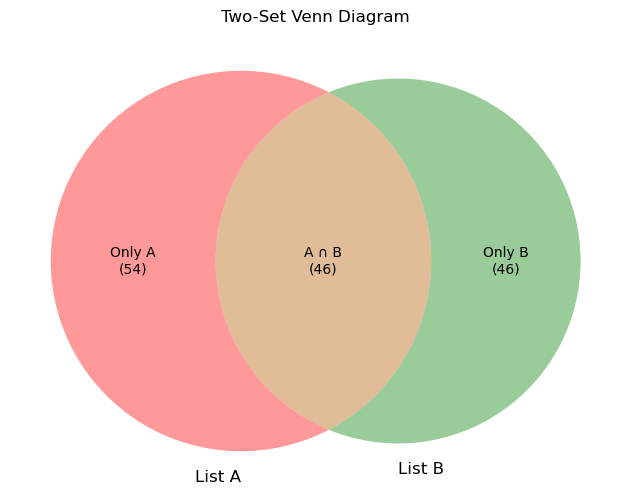

In [62]:
from matplotlib_venn import venn2

def plot_venn_diagram_two_lists(list_a, list_b):
    set_a, set_b = set(list_a), set(list_b)

    plt.figure(figsize=(8, 6))
    venn = venn2([set_a, set_b], set_labels=('List A', 'List B'))

    venn.get_label_by_id('10').set_text(f"Only A\n({len(set_a - set_b)})")
    venn.get_label_by_id('01').set_text(f"Only B\n({len(set_b - set_a)})")
    venn.get_label_by_id('11').set_text(f"A ∩ B\n({len(set_a & set_b)})")
    
    plt.title("Two-Set Venn Diagram")
    plt.show()

plot_venn_diagram_two_lists(sentiment_ml1, sentiment_ml2)


# Data Visualization

## Word Cloud

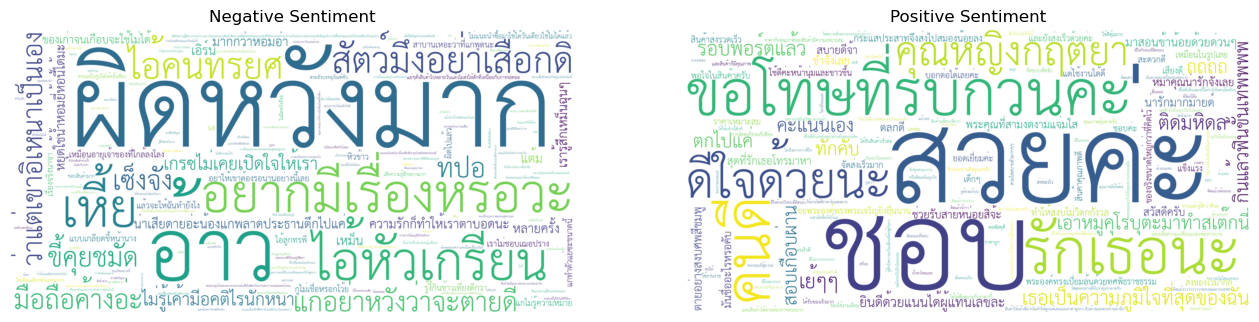

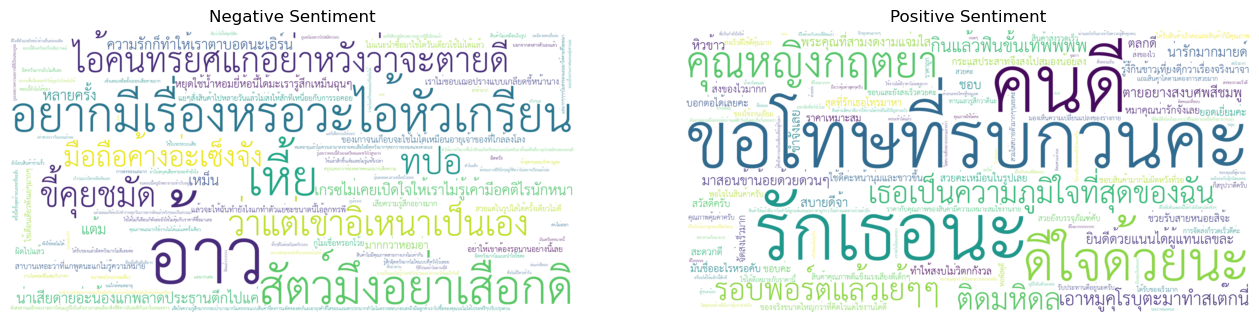

In [63]:
def word_cloud(lst):
    text_neg = " ".join(text for text, sentiment in lst if sentiment == 'negative')
    text_pos = " ".join(text for text, sentiment in lst if sentiment == 'positive')

    fp = 'THSarabunNew.ttf'
    reg = r"[ก-๙a-zA-Z']+"

    wordcloud_neg = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000,
                            height=2000, width=4000, font_path=fp, regexp=reg).generate(text_neg)

    wordcloud_pos = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000,
                            height=2000, width=4000, font_path=fp, regexp=reg).generate(text_pos)

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    axs[0].imshow(wordcloud_neg, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title(f'Negative Sentiment')

    axs[1].imshow(wordcloud_pos, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title(f'Positive Sentiment')

    plt.show()

word_cloud(sentiment_ml1)
word_cloud(sentiment_ml2)

## Confidence

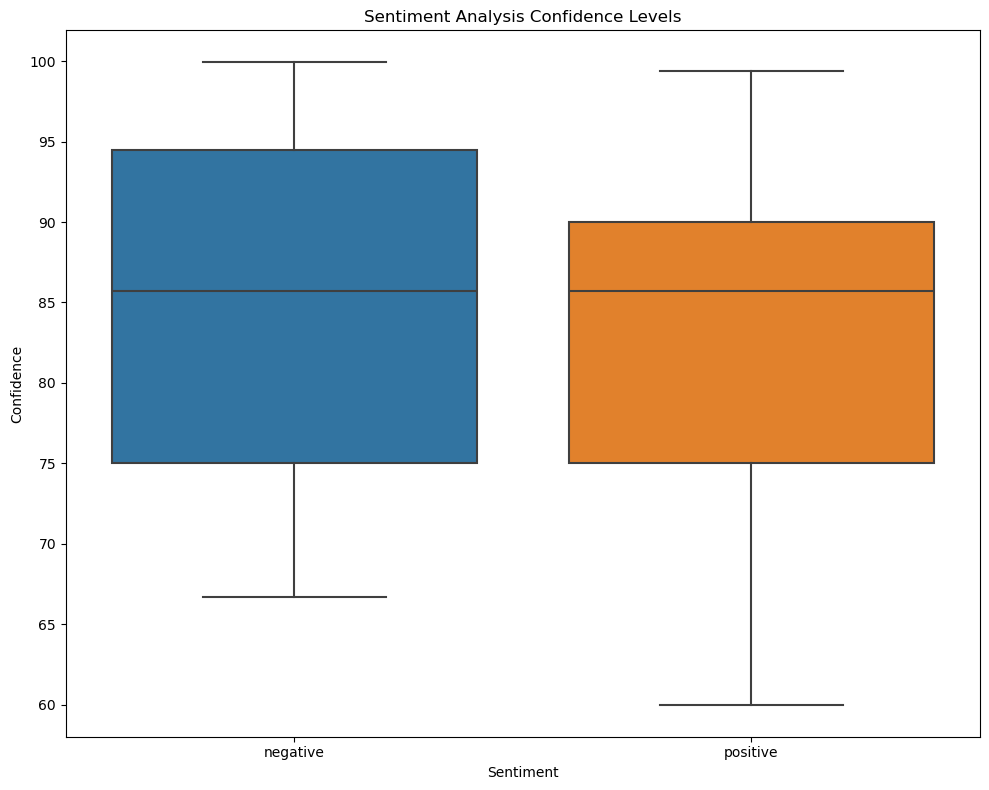

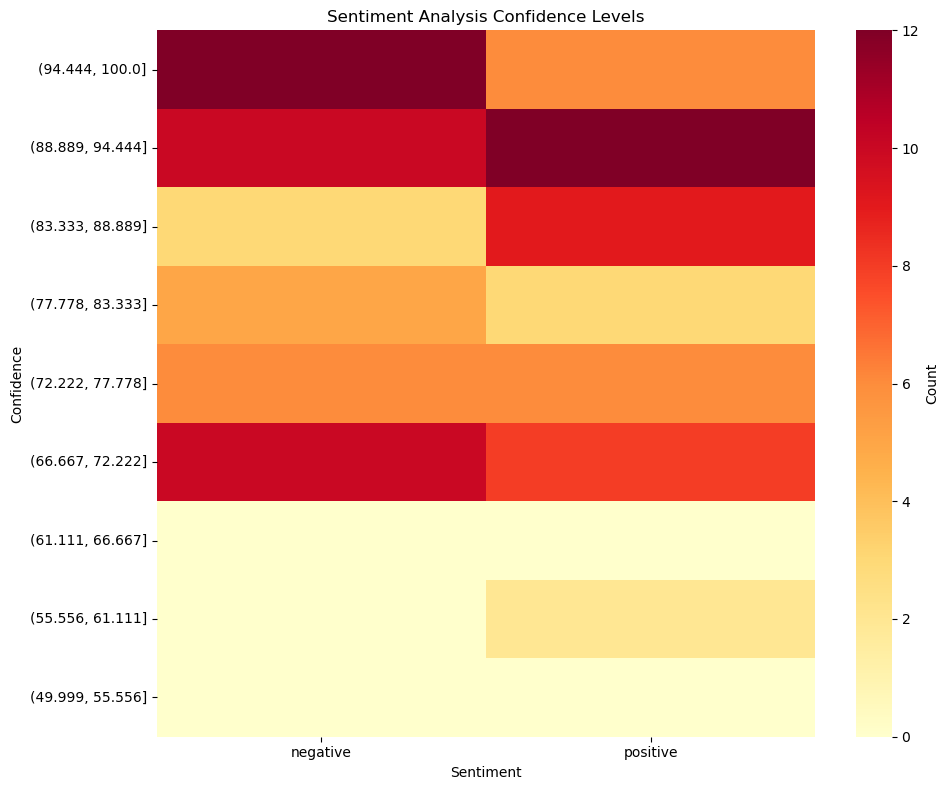

In [64]:
def confidence(lst, method="boxplot"):
    df = pd.DataFrame(lst, columns=['Sentiment', 'Confidence'])
    plt.figure(figsize=(10, 8))
    
    if method == "boxplot":
        sns.boxplot(x='Sentiment', y='Confidence', data=df)
        
    elif method == "heatmap":
        bins = np.linspace(50, 100, 10)
        df['Confidence_Range'] = pd.cut(df['Confidence'], bins=bins, include_lowest=True)
        pivot_df = df.pivot_table(values='Confidence', index='Confidence_Range', 
                                  columns='Sentiment', aggfunc='count', fill_value=0)
        pivot_df = pivot_df.sort_index(ascending=False)
        sns.heatmap(pivot_df, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Count'})
    
    plt.xlabel("Sentiment")
    plt.ylabel("Confidence")
    plt.title("Sentiment Analysis Confidence Levels")
    plt.tight_layout()
    plt.show()

confidence(confidence_lst, "boxplot")
confidence(confidence_lst, "heatmap")

# Test 2

In [ ]:
from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_tha

In [ ]:
from thai_sentiment import get_sentiment

get_sentiment("ควยไรไอสัส")